In [1]:
import sys
import re

WAV_FILE_PATH = 'data/wav.root'

import uproot

import numpy as np
from matplotlib import pyplot as plt

# Load file

In [2]:
DATA_DIR = 'wav/CTPPS/TimingDiamond/sector 45/station 220cyl/cyl_hr'

In [3]:
file_raw = uproot.open(WAV_FILE_PATH)

len(file_raw)

35673

In [4]:
file_raw.keys()[:20]

['wav;1',
 'wav/CTPPS;1',
 'wav/CTPPS/TimingDiamond;1',
 'wav/CTPPS/TimingDiamond/sector 45;1',
 'wav/CTPPS/TimingDiamond/sector 45/station 220cyl;1',
 'wav/CTPPS/TimingDiamond/sector 45/station 220cyl/cyl_hr;1',
 'wav/CTPPS/TimingDiamond/sector 45/station 220cyl/cyl_hr/samples_graph_0ctpps_ti_diamond_45_220cyl_cyl_hr_0_11;1',
 'wav/CTPPS/TimingDiamond/sector 45/station 220cyl/cyl_hr/samples_graph_0ctpps_ti_diamond_45_220cyl_cyl_hr_0_11/cal;1',
 'wav/CTPPS/TimingDiamond/sector 45/station 220cyl/cyl_hr/samples_graph_0ctpps_ti_diamond_45_220cyl_cyl_hr_0_11/noncal;1',
 'wav/CTPPS/TimingDiamond/sector 45/station 220cyl/cyl_hr/samples_graph_1ctpps_ti_diamond_45_220cyl_cyl_hr_1_11;1',
 'wav/CTPPS/TimingDiamond/sector 45/station 220cyl/cyl_hr/samples_graph_1ctpps_ti_diamond_45_220cyl_cyl_hr_1_11/cal;1',
 'wav/CTPPS/TimingDiamond/sector 45/station 220cyl/cyl_hr/samples_graph_1ctpps_ti_diamond_45_220cyl_cyl_hr_1_11/noncal;1',
 'wav/CTPPS/TimingDiamond/sector 45/station 220cyl/cyl_hr/samples_gra

In [5]:
len(file_raw[DATA_DIR])

8502

# Produce dataset

In [6]:
dataset_cal = []
dataset_noncal = []

for key, event_data in file_raw[DATA_DIR].items():
    if isinstance(event_data, uproot.reading.ReadOnlyDirectory):
        cal_data = np.array(event_data['cal;1'].values())
        dataset_cal.append(cal_data)
        noncal_data = np.array(event_data['noncal;1'].values())
        dataset_noncal.append(noncal_data)
        
dataset_cal = np.array(dataset_cal)
dataset_noncal = np.array(dataset_noncal)
dataset_cal.shape, dataset_noncal.shape

((2834, 2, 24), (2834, 2, 48))

# Examples

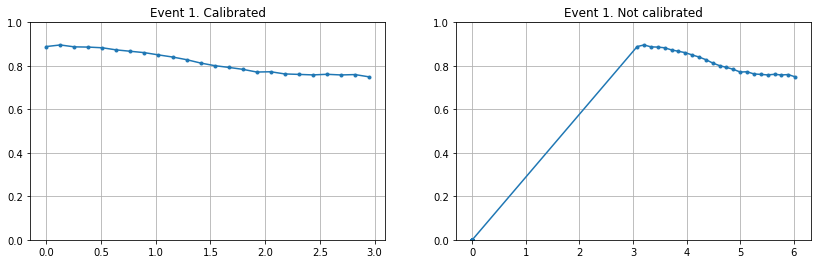

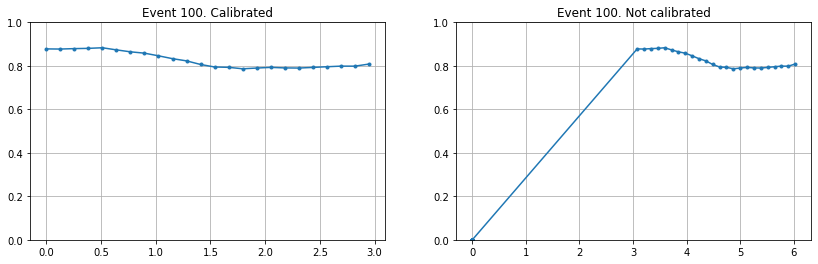

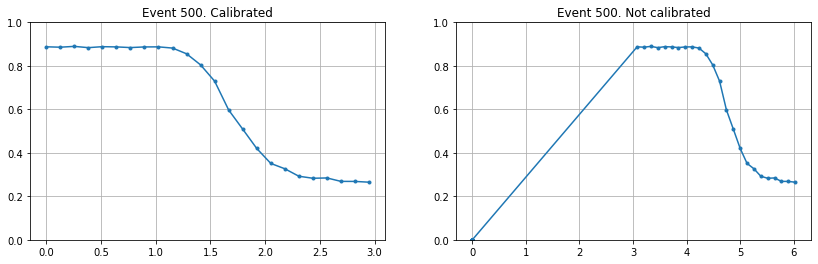

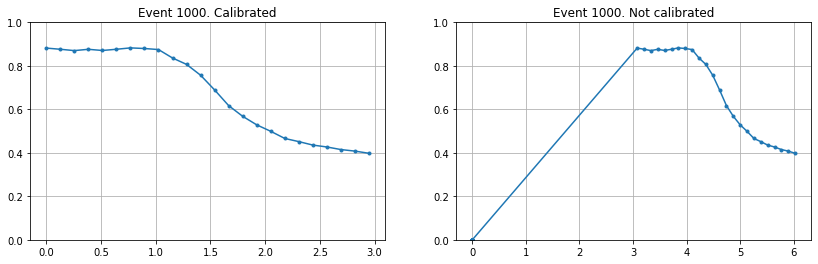

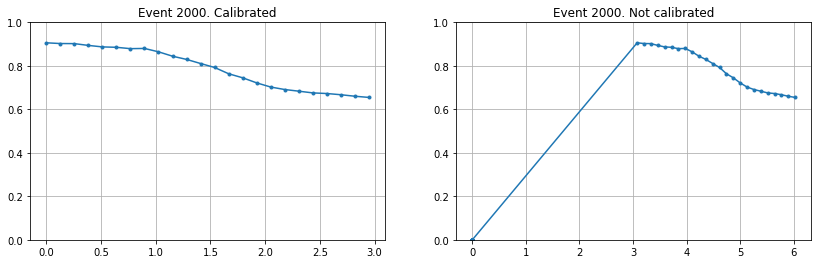

In [7]:
for i in [1, 100, 500, 1000, 2000]:
    plt.figure(figsize=(14, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(dataset_cal[i, 0], dataset_cal[i, 1], marker='.')
    plt.title(f'Event {i}. Calibrated')
    plt.ylim(0, 1)
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.plot(dataset_noncal[i, 0], dataset_noncal[i, 1], marker='.')
    plt.title(f'Event {i}. Not calibrated')
    plt.ylim(0, 1)
    plt.grid()
    
    plt.show()